In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [19]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

C:\Users\MOHITL~1\AppData\Local\Temp/ipykernel_2932/1334766590.py:12: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


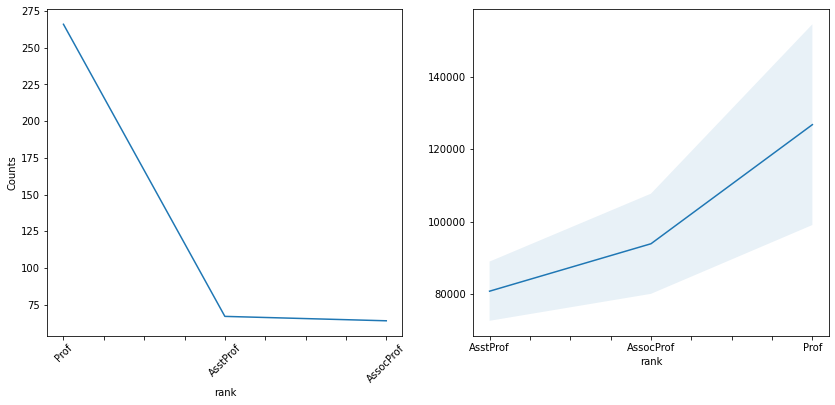

In [65]:
plot_feature(df, 'rank')

In [20]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

C:\Users\MOHITL~1\AppData\Local\Temp/ipykernel_2932/1334766590.py:12: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


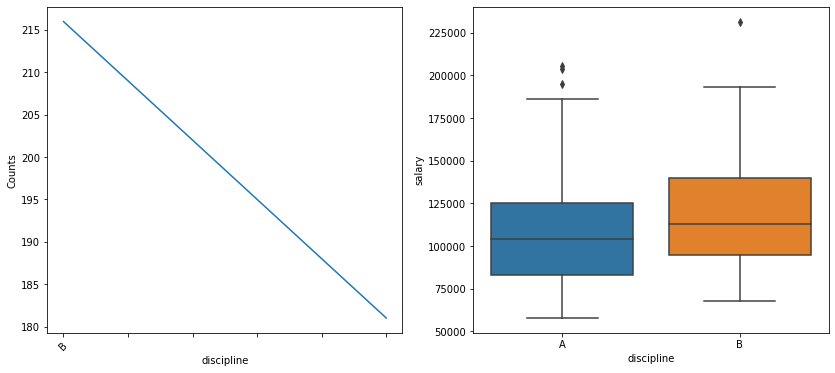

In [66]:
plot_feature(df, 'discipline')

In [23]:
df['yrs.since.phd'].unique()

array([19, 20,  4, 45, 40,  6, 30, 21, 18, 12,  7,  1,  2, 38, 37, 39, 31,
       36, 34, 24, 13, 35,  5, 11, 22, 41,  9, 23, 25, 28, 16, 14, 10,  8,
        3, 33, 17, 29, 26, 43, 15, 42, 32, 54, 56, 27, 48, 46, 47, 52, 51,
       49, 44], dtype=int64)

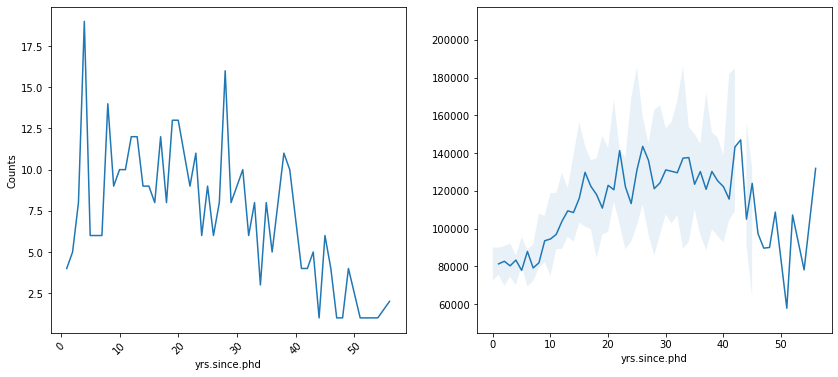

In [68]:
plot_feature(df,'yrs.since.phd')

In [24]:
df['yrs.service'].unique()

array([18, 16,  3, 39, 41,  6, 23, 45, 20,  8,  2,  1,  0, 34, 36, 26, 31,
       30, 19,  4,  9, 21, 27, 38, 15, 28, 25, 11,  5, 12, 17, 14, 37,  7,
       10, 29, 32, 22, 49, 57, 24, 53, 33, 40, 35, 43, 44, 48, 46, 51, 13,
       60], dtype=int64)

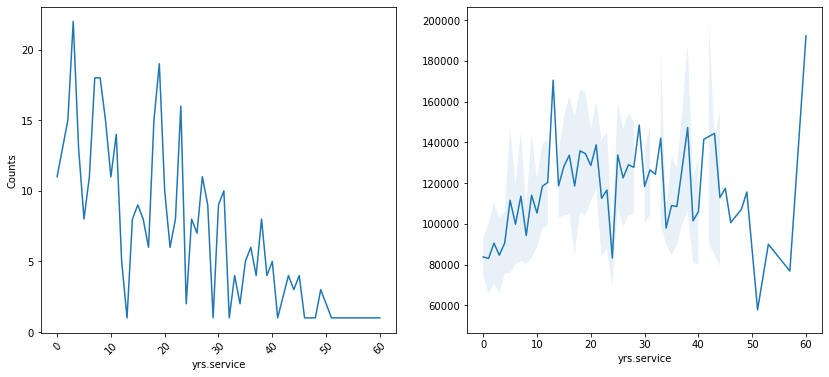

In [69]:
plot_feature(df,'yrs.service')

In [25]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

C:\Users\MOHITL~1\AppData\Local\Temp/ipykernel_2932/1334766590.py:12: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df[col].cat.reorder_categories(levels, inplace=True)


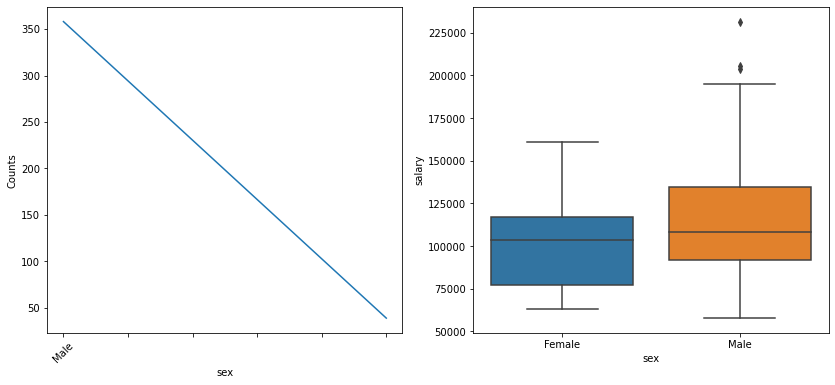

In [67]:
plot_feature(df, 'sex')

In [26]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

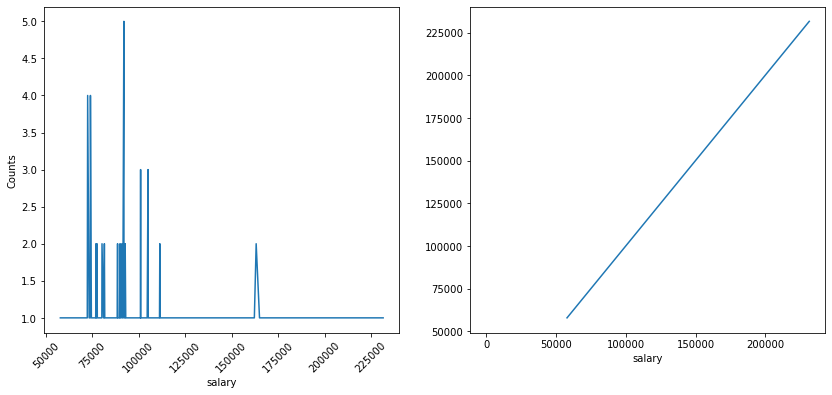

In [70]:
plot_feature(df,'salary')

In [28]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [30]:
numeric_cols=['yrs.since.phd','yrs.service','salary']

In [31]:
categorical_cols=['rank','discipline','sex']

In [32]:
df.describe(include = [np.number])

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [33]:
df.describe(include = ['O'])

,rank,discipline,sex
count,397,397,397
unique,3,2,2
top,Prof,B,Male
freq,266,216,358


C:\Users\MohitLewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MohitLewis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


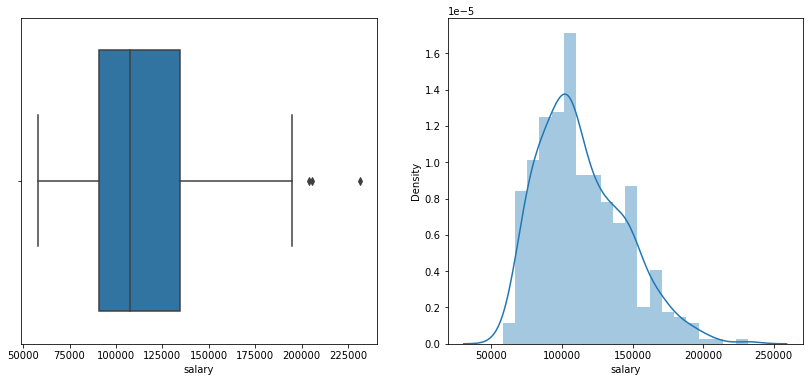

In [36]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df.salary)
plt.subplot(1,2,2)
sns.distplot(df.salary, bins=20)
plt.show()

In [37]:
stat =df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('Upper and lower bounds for the suspected outliers are {} and {}.'.format(upper, lower))

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64
Upper and lower bounds for the suspected outliers are 198962.5 and 26222.5.


In [45]:
df[df.salary <198962.5]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [47]:
df[df.salary > 26222.5]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [51]:
df.loc[df.salary > 26222.5, 'yrs.service'].unique()

array([18, 16,  3, 39, 41,  6, 23, 45, 20,  8,  2,  1,  0, 34, 36, 26, 31,
       30, 19,  4,  9, 21, 27, 38, 15, 28, 25, 11,  5, 12, 17, 14, 37,  7,
       10, 29, 32, 22, 49, 57, 24, 53, 33, 40, 35, 43, 44, 48, 46, 51, 13,
       60], dtype=int64)

In [52]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [75]:
def plot_feature(df, col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'discipline':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
        
    plt.xticks(rotations=40)
    plt.ylabel('salaries')
    plt.show()
    

In [71]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

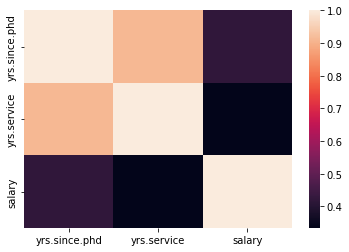

In [87]:
corr = df.corr()
sns.heatmap(corr)


C:\Users\MohitLewis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service'>

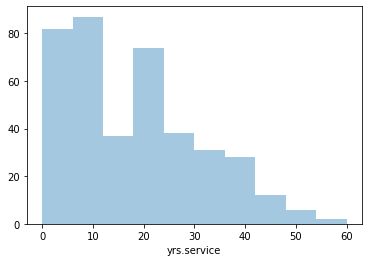

In [5]:
sns.distplot(df['yrs.service'], kde=False, bins=10)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

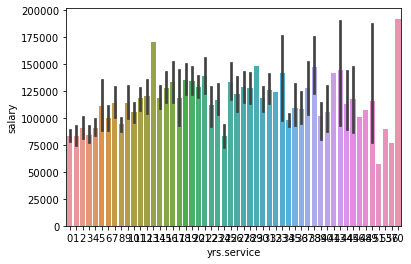

In [7]:
sns.barplot(x='yrs.service', y='salary', data=df)

C:\Users\MohitLewis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

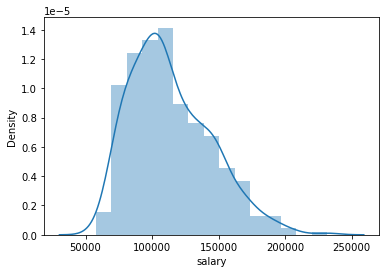

In [80]:
sns.distplot(df.salary)

In [9]:
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/3, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [82]:
lr = LinearRegression()
lr.fit(df[['yrs.service']],df['salary'])
print( "Salary = " + str(lr.coef_[0]) + " * yrs.service + " + str(lr.intercept_))

Salary = 779.5691136947379 * yrs.service + 99974.65286632921


In [83]:
y_hat = lr.coef_[0]* df[['yrs.service']]+lr.intercept_
sk.metrics.mean_squared_error(y_hat,df['salary'])

812572677.8805966